## Lesson 1A - Single Layer LSTM

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Lesson 1B - Multiple Layer LSTM

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## Lesson 1C - Multiple Layer GRU

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## Lesson 2 - On Sarcasm dataset

In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [4]:
with open("tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [5]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [7]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

Single LSTM

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(units=32)),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [10]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded, training_labels, epochs=50,
                    validation_data=(testing_padded, testing_labels), verbose=1)

Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 [==============================] - 20s 1ms/sample - loss: 0.4582 - accuracy: 0.7727 - val_loss: 0.3860 - val_accuracy: 0.8238
Epoch 2/50
20000/20000 [==============================] - 12s 610us/sample - loss: 0.3569 - accuracy: 0.8367 - val_loss: 0.3756 - val_accuracy: 0.8256
Epoch 3/50
20000/20000 [==============================] - 12s 612us/sample - loss: 0.3312 - accuracy: 0.8486 - val_loss: 0.3717 - val_accuracy: 0.8310
Epoch 4/50
20000/20000 [==============================] - 13s 631us/sample - loss: 0.3142 - accuracy: 0.8602 - val_loss: 0.3744 - val_accuracy: 0.8325
Epoch 5/50
20000/20000 [==============================] - 13s 632us/sample - loss: 0.3021 - accuracy: 0.8651 - val_loss: 0.3755 - val_accuracy: 0.8265
Epoch 6/50
20000/20000 [==============================] - 13s 629us/sample - loss: 0.2932 - accuracy: 0.8709 - val_loss: 0.3858 - val_accuracy: 0.8292
Epoch 7/50
20000/20000 [=======================

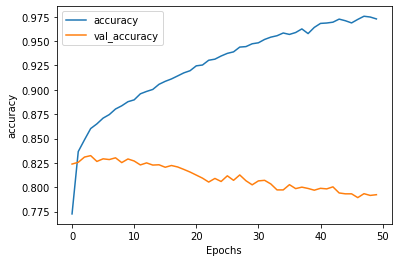

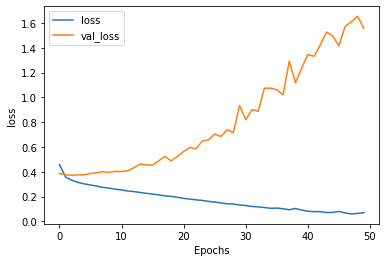

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Convolutional

In [18]:
import gc
gc.collect()

89255

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(training_padded, training_labels, epochs=50,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 [==============================] - 6s 293us/sample - loss: 0.4651 - accuracy: 0.7659 - val_loss: 0.4118 - val_accuracy: 0.8104
Epoch 2/50
20000/20000 [==============================] - 5s 241us/sample - loss: 0.3599 - accuracy: 0.8383 - val_loss: 0.3880 - val_accuracy: 0.8261
Epoch 3/50
20000/20000 [==============================] - 5s 238us/sample - loss: 0.3191 - accuracy: 0.8582 - val_loss: 0.3897 - val_accuracy: 0.8238
Epoch 4/50
20000/20000 [==============================] - 5s 241us/sample - loss: 0.2871 - accuracy: 0.8780 - val_loss: 0.4145 - val_accuracy: 0.8156
Epoch 5/50
20000/20000 [==============================] - 5s 240us/sample - loss: 0.2542 - accuracy: 0.8931 - val_loss: 0.4257 - val_accuracy: 0.8204
Epoch 6/50
20000/20000 [==============================] - 5s 252us/sample - loss: 0.2219 - accuracy: 0.9100 - val_loss: 0.4541 - val_accuracy: 0.8171
Epoch 7/50
20000/20000 [===========================

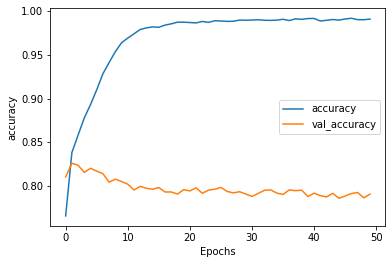

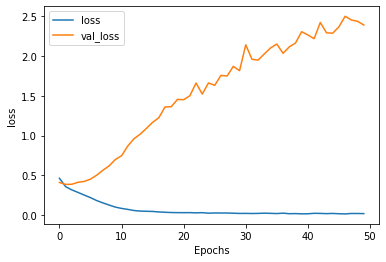

In [15]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

GRU

In [19]:
gc.collect()

329

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(GRU(units=32)),
    Dense(units=6, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 25,997
Trainable params: 25,997
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(training_padded, training_labels, epochs=50,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 - 16s - loss: 0.4492 - accuracy: 0.7725 - val_loss: 0.3869 - val_accuracy: 0.8195
Epoch 2/50
20000/20000 - 13s - loss: 0.3529 - accuracy: 0.8376 - val_loss: 0.3812 - val_accuracy: 0.8223
Epoch 3/50
20000/20000 - 13s - loss: 0.3282 - accuracy: 0.8492 - val_loss: 0.3679 - val_accuracy: 0.8290
Epoch 4/50
20000/20000 - 12s - loss: 0.3112 - accuracy: 0.8596 - val_loss: 0.3844 - val_accuracy: 0.8235
Epoch 5/50
20000/20000 - 12s - loss: 0.2986 - accuracy: 0.8650 - val_loss: 0.3785 - val_accuracy: 0.8274
Epoch 6/50
20000/20000 - 12s - loss: 0.2870 - accuracy: 0.8726 - val_loss: 0.3821 - val_accuracy: 0.8307
Epoch 7/50
20000/20000 - 12s - loss: 0.2752 - accuracy: 0.8819 - val_loss: 0.3800 - val_accuracy: 0.8286
Epoch 8/50
20000/20000 - 13s - loss: 0.2691 - accuracy: 0.8824 - val_loss: 0.3910 - val_accuracy: 0.8255
Epoch 9/50
20000/20000 - 12s - loss: 0.2580 - accuracy: 0.8895 - val_loss: 0.3987 - val_accuracy: 0.8237
Epoch 

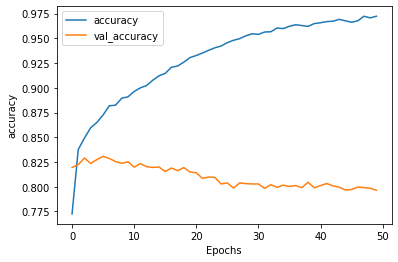

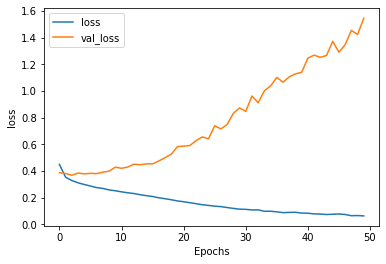

In [22]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')